In [7]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
configFileName = 'config/VietnamCropDatasetLocal.csv'

In [9]:
# lets get the dataset file
df = pd.read_csv(configFileName)
df

,data,label,ntiles,ymin,ymax,xmin,xmax
0,/Users/jacaraba/Desktop/CURRENT_PROJECTS/LCLUC...,/Users/jacaraba/Desktop/CURRENT_PROJECTS/LCLUC...,20,0,5000,0,5000
1,/Users/jacaraba/Desktop/CURRENT_PROJECTS/LCLUC...,/Users/jacaraba/Desktop/CURRENT_PROJECTS/LCLUC...,20,0,5000,0,5000
2,/Users/jacaraba/Desktop/CURRENT_PROJECTS/LCLUC...,/Users/jacaraba/Desktop/CURRENT_PROJECTS/LCLUC...,20,0,5000,0,5000


In [10]:
# read some of the images
#for i in df.index:
#    x = xr.open_rasterio(df['data'][i]).values
#    y = np.squeeze(xr.open_rasterio(df['label'][i]).values)
#    print(x.shape, y.shape, np.unique(y))

Requires us to merge 15 into 5 and go from there. There are several clouds that might be involved that will need other types of classes.

## Working with color corrections

In [11]:
x = xr.open_rasterio(df['data'][0]).values
x = np.clip(x, 0, 10000)
x = np.moveaxis(x,0,-1)
print(x.min(), x.max(), x.mean(), x.std())

0 7816 1264.4652001257143 1219.5940733425582


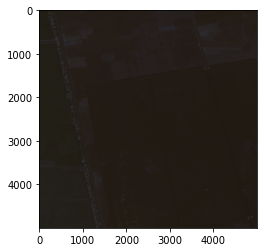

In [12]:
plt.imshow(x[:,:,:3] / 10000.0)
plt.show()

In [13]:
>>> from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x.reshape(-1, x.shape[-1])).reshape(x.shape)
print(x.min(), x.max(), x.mean(), x.std(), x.shape)
#MinMaxScaler()
#>>> print(scaler.data_max_)
#[ 1. 18.]
#>>> print(scaler.transform(data))
#[[0.   0.  ]
# [0.25 0.25]
# [0.5  0.5 ]
# [1.   1.  ]]
#>>> print(scaler.transform([[2, 2]]))
#[[1.5 0. ]]

0.0 1.0 0.15451874123093318 0.18551669728354517 (5000, 5000, 7)


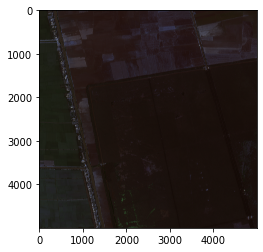

In [14]:
plt.imshow(x[:,:,:3])
plt.show()

In [ ]:
#CS1 = (3. * NIR1) / (Blue + Green + Red)
#CS2 = (Blue + Green + Red + NIR1) / 4.
CS1 = (3. * x[3,:,:]) / (x[0,:,:] + x[1,:,:] + x[2,:,:])
CS2 = (x[0,:,:] + x[1,:,:] + x[2,:,:] + x[3,:,:]) / 4.

In [ ]:
plt.imshow(CS1)
plt.show()

In [ ]:
plt.imshow(CS2)
plt.show()

In [ ]:
# show the color matching card in the reference image and input image,
# respectively
#cv2.imshow("Reference Color Card", refCard)
#cv2.imshow("Input Color Card", imageCard)
# apply histogram matching from the color matching card in the
# reference image to the color matching card in the input image
#print("[INFO] matching images...")
#imageCard = exposure.match_histograms(imageCard, refCard,
#	multichannel=True)
# show our input color matching card after histogram matching
#cv2.imshow("Input Color Card After Matching", imageCard)
#cv2.waitKey(0)